**TODO**
1. Написать когда по 4 сигналам прогнозируем 5ый. 

In [1]:
import pandas as pd

https://curiousily.com/posts/time-series-forecasting-with-lstm-for-daily-coronavirus-cases/ 

In [6]:
import torch
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from pandas.plotting import register_matplotlib_converters
from torch import nn, optim
from importlib import reload





%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#93D30C", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 14, 10
register_matplotlib_converters()





device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)


import random
def set_determenistic(seed=777,precision=10):
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True
    torch.manual_seed(seed)
    torch.set_printoptions(precision=precision)

set_determenistic()

cuda:0


In [7]:
%%time
data_path = './data/'
df = pd.read_csv(data_path+'household_power_consumption.txt',sep=';')
df['Datetime'] = df['Date']+ ' ' + df['Time']
df.index = pd.to_datetime(df['Datetime'])
df = df.drop(['Date','Time','Datetime'],1)

for col in df:
    df[col]=pd.to_numeric(df[col], errors='coerce')
df = df.dropna()
df.head(3)
dff  = df.copy()
df= dff[:1495]

<string>:2: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.


Wall time: 2min 26s


In [8]:
import sys
sys.path.insert(1, './DL_anomaly_detection')
import models, src, main,stastics,generate_residuals
# src = reload(src)
# models = reload(models)
# generate_residuals = reload(generate_residuals)
# stastics = reload(stastics)
# main = reload(main)

In [9]:
dfs = df.copy()
a = main.DL_AD()

Epoch: 01
	Train Loss: 0.233
	 Val. Loss: 0.294 
Epoch: 02
	Train Loss: 0.197
	 Val. Loss: 0.254 
Epoch: 03
	Train Loss: 0.166
	 Val. Loss: 0.218 
Epoch: 04
	Train Loss: 0.138
	 Val. Loss: 0.179 
Epoch: 05
	Train Loss: 0.109
	 Val. Loss: 0.138 
Epoch: 06
	Train Loss: 0.082
	 Val. Loss: 0.103 
Epoch: 07
	Train Loss: 0.065
	 Val. Loss: 0.083 
Epoch: 08
	Train Loss: 0.058
	 Val. Loss: 0.075 

Test Loss: 0.094


C:\Users\kompn\anaconda3\lib\site-packages\torch\nn\modules\loss.py:432: UserWarning: Using a target size (torch.Size([296, 5, 7])) that is different to the input size (torch.Size([296, 1, 7])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


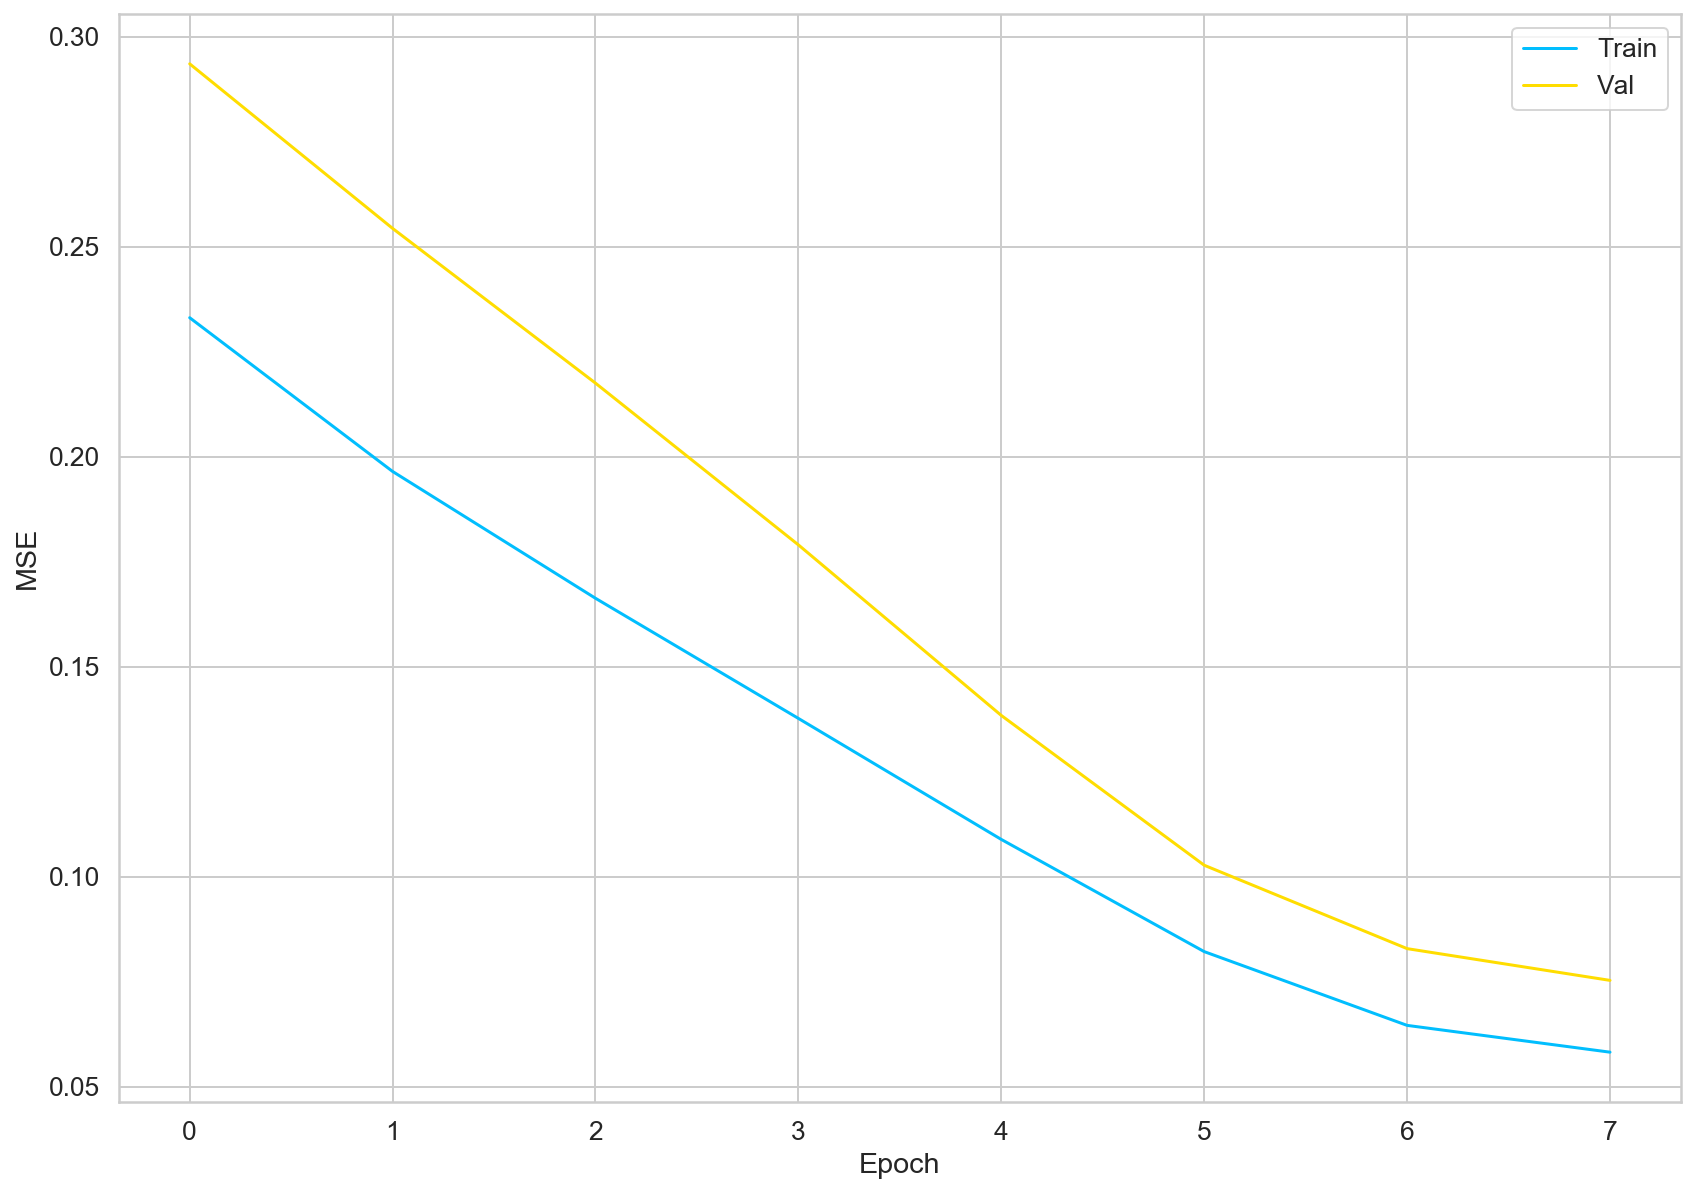

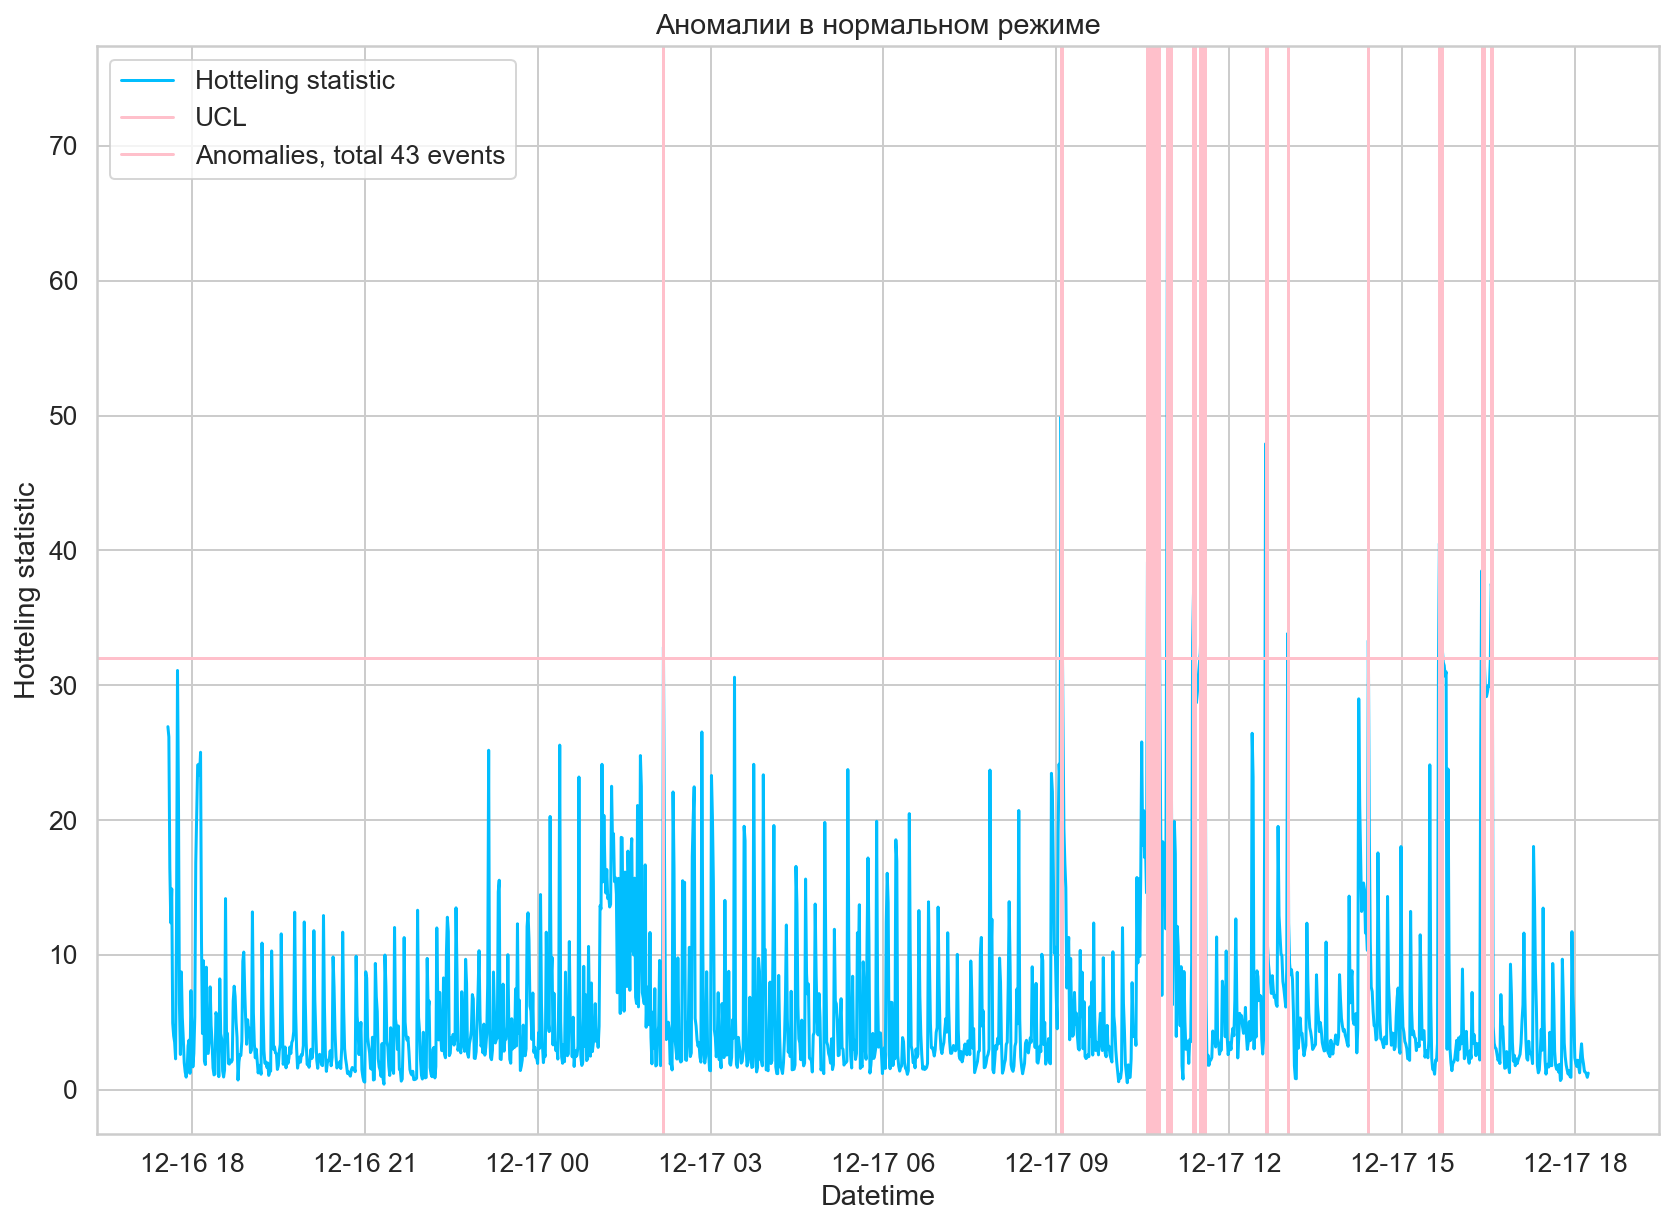

In [10]:
dd = a.fit(dfs,n_epochs=8)

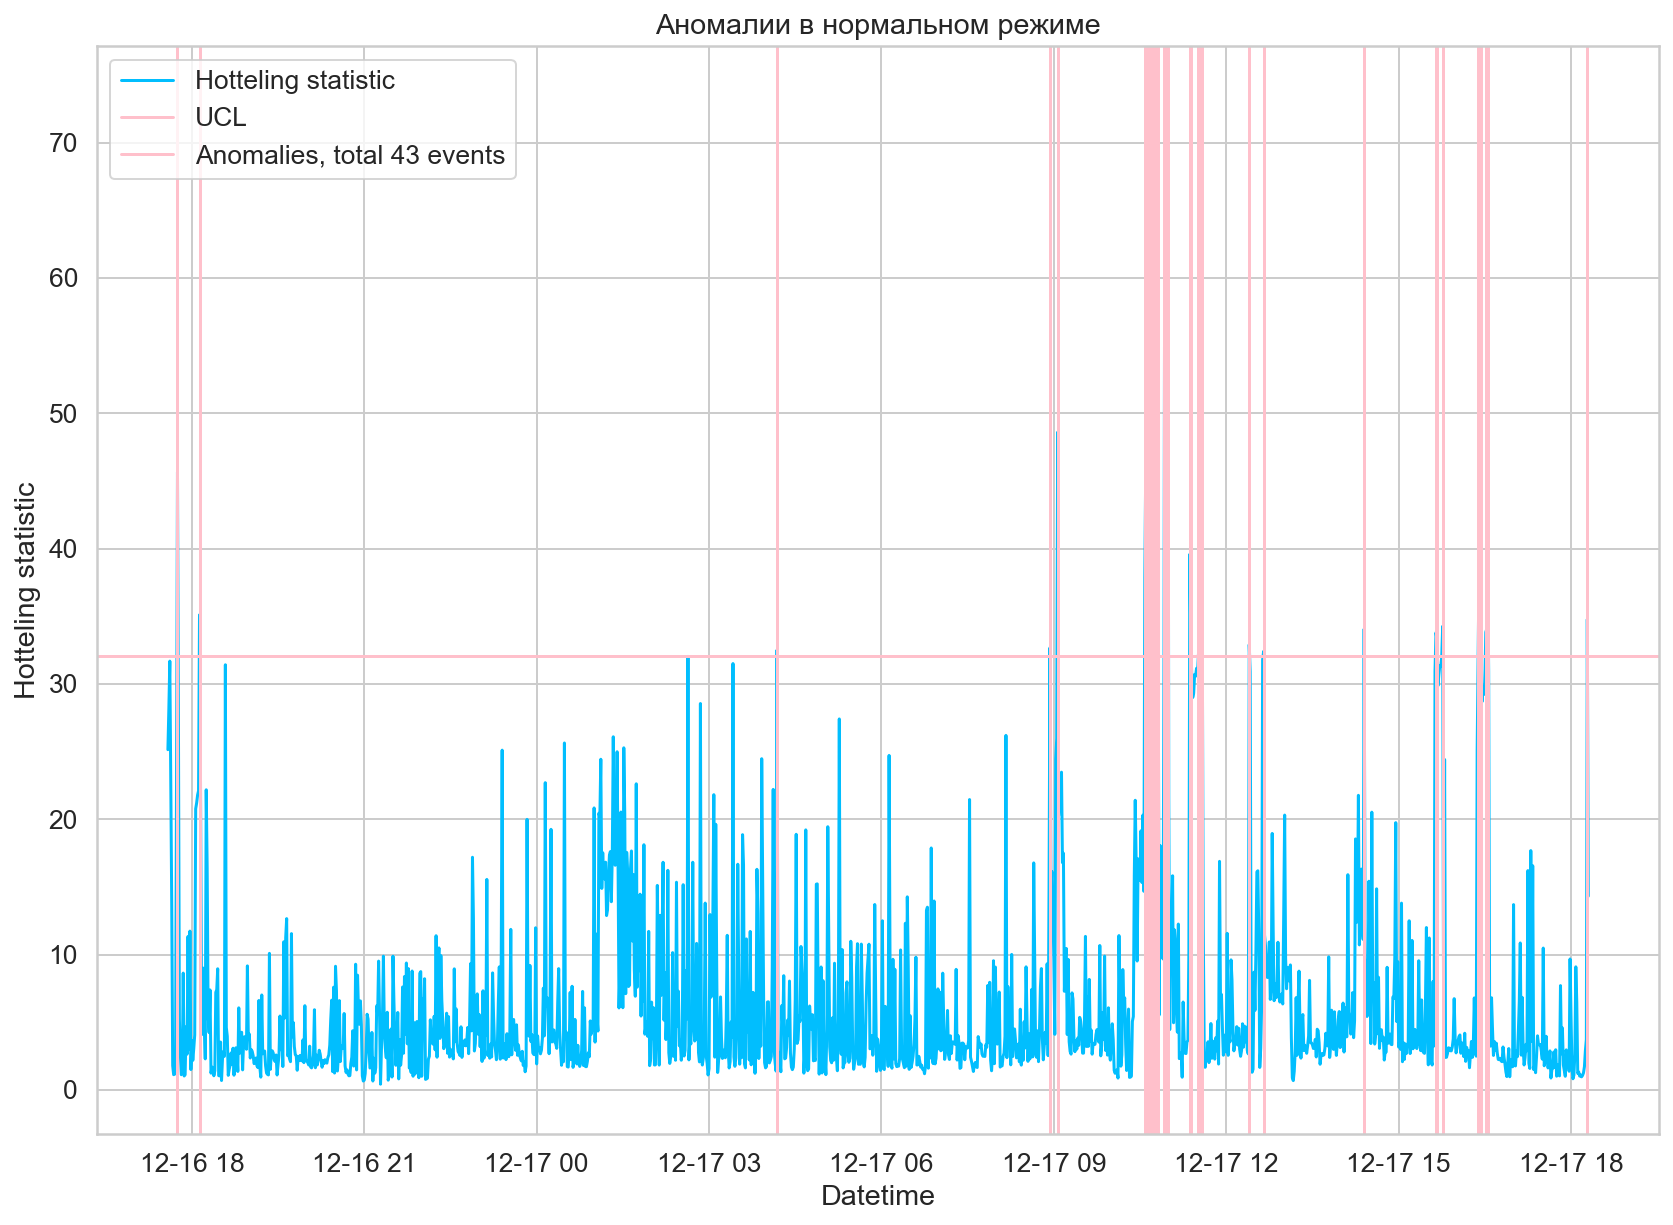

In [11]:
b= a.predict_anomaly(dfs)

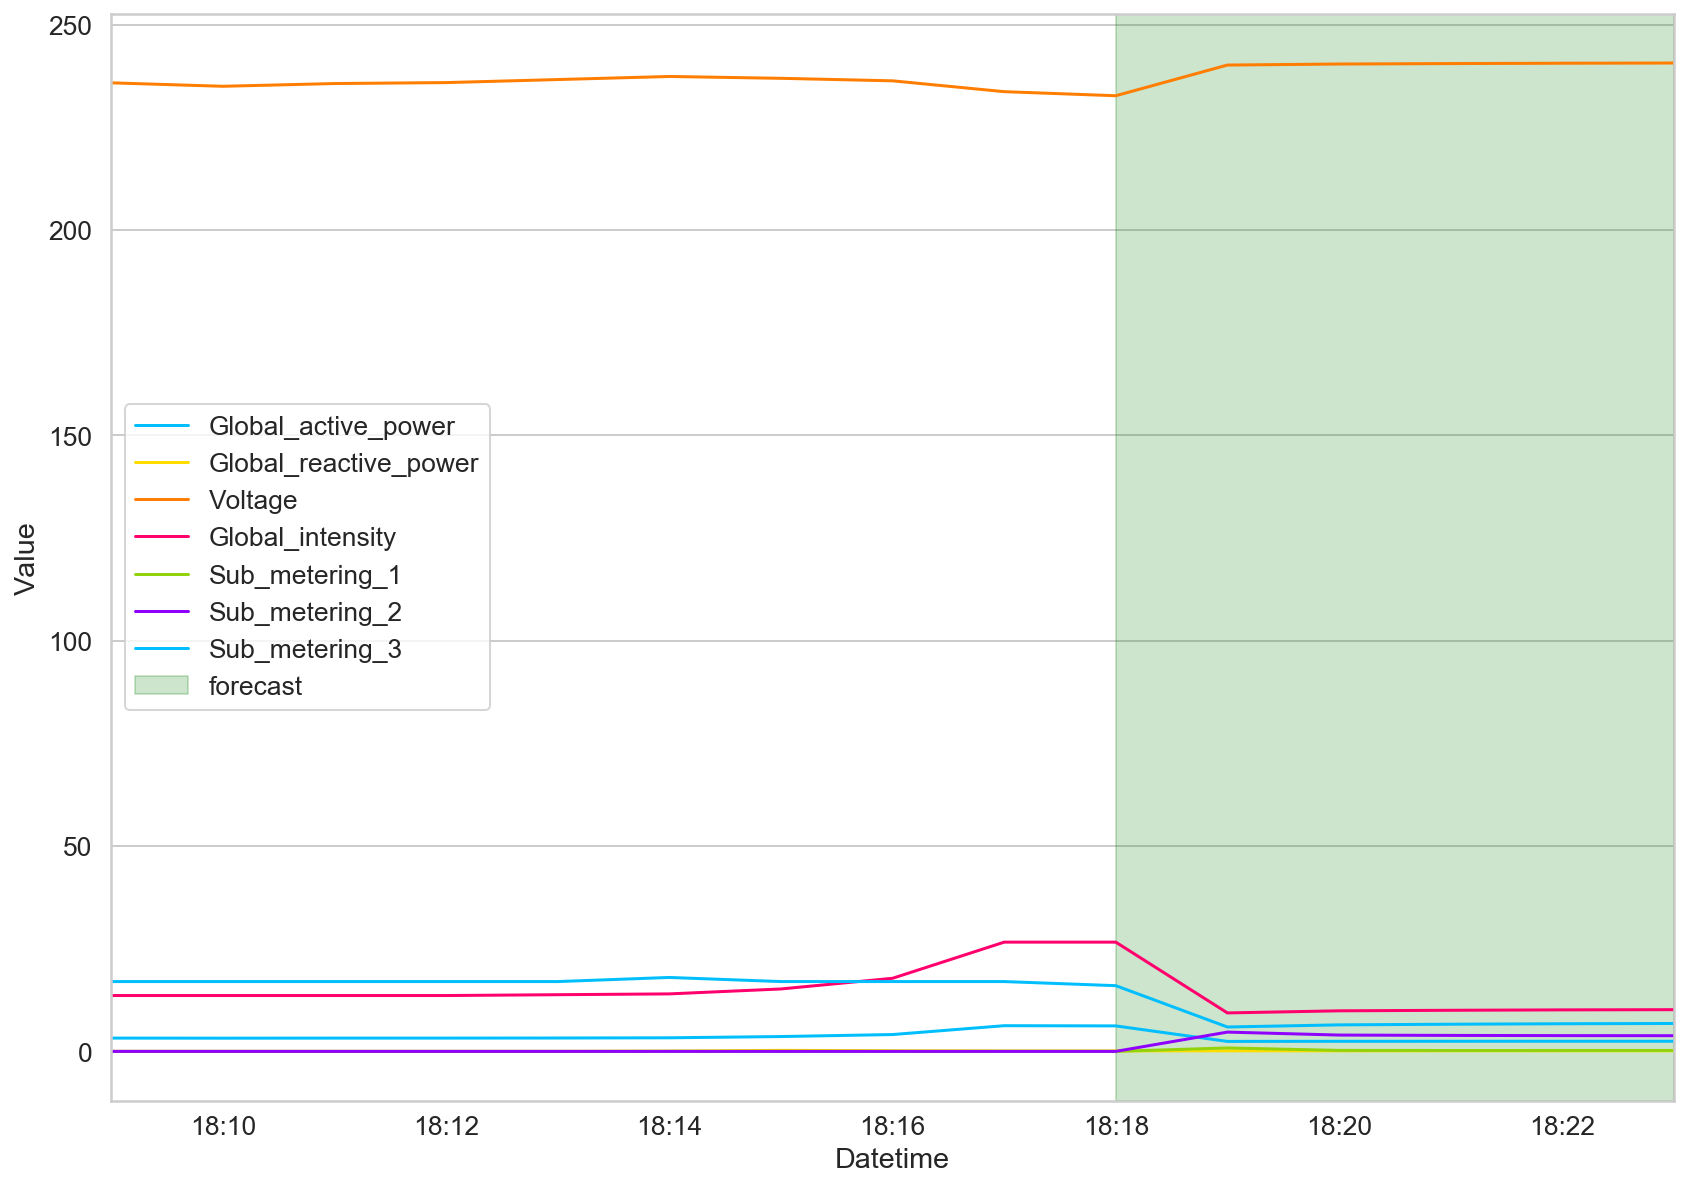

In [12]:
b= a.forecast(dfs)